In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [7]:
dataset.value_counts().sum()

10000

In [10]:
N = dataset.value_counts().sum()

In [9]:
len(dataset.columns)

10

In [11]:
d = len(dataset.columns)

In [12]:
#list to list ads selected by each customer
ads_selected = []

In [13]:
# number of times ad i  selected up to round n
number_of_selection = [0] * d

In [14]:
# sum of rewards of ad i up to round n
sum_of_rewards = [0] * d

In [15]:
#total rewards over all rounds
total_rewards = 0

In [16]:
import math

In [22]:
for n in range(0, N):
    max_upper_bound = 0
    ad = 0
    for i in range(0, d):
        if number_of_selection[i] > 0:
            average_reward = sum_of_rewards[i]/number_of_selection[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e500
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selection[ad] += 1
    sum_of_rewards[ad] = sum_of_rewards[ad] + dataset.values[n,ad]
    total_rewards = total_rewards + sum_of_rewards[ad]

Text(0, 0.5, 'number of times each ad was selected')

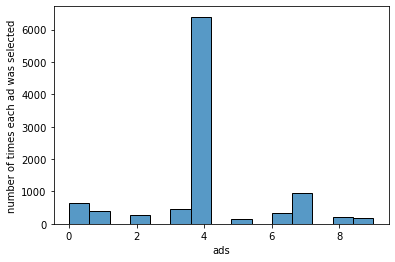

In [24]:
sns.histplot(ads_selected)
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')

Text(0, 0.5, 'number of times each ad was selected')

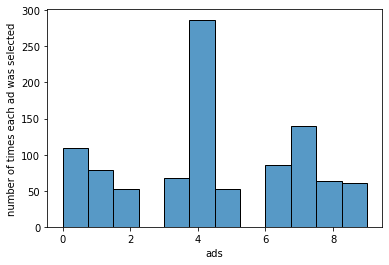

In [25]:
#checking for lower number of customers
N = 1000
d = 10
ads_selected = []
number_of_selection = [0] * d
sum_of_rewards = [0] * d
total_rewards = 0

for n in range(0, N):
    max_upper_bound = 0
    ad = 0
    for i in range(0, d):
        if number_of_selection[i] > 0:
            average_reward = sum_of_rewards[i]/number_of_selection[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e500
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selection[ad] += 1
    sum_of_rewards[ad] = sum_of_rewards[ad] + dataset.values[n,ad]
    total_rewards = total_rewards + sum_of_rewards[ad]
    
sns.histplot(ads_selected)
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')

In [26]:
#still ad 4 was found to be the one that should be exploited

Text(0, 0.5, 'number of times each ad was selected')

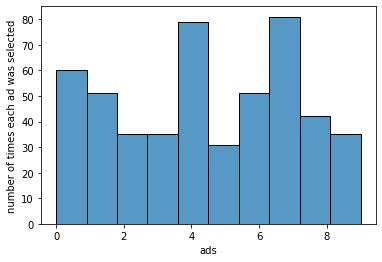

In [28]:
#checking for even lower number of customers
N = 500
d = 10
ads_selected = []
number_of_selection = [0] * d
sum_of_rewards = [0] * d
total_rewards = 0

for n in range(0, N):
    max_upper_bound = 0
    ad = 0
    for i in range(0, d):
        if number_of_selection[i] > 0:
            average_reward = sum_of_rewards[i]/number_of_selection[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e500
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selection[ad] += 1
    sum_of_rewards[ad] = sum_of_rewards[ad] + dataset.values[n,ad]
    total_rewards = total_rewards + sum_of_rewards[ad]
    
sns.histplot(ads_selected)
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')

In [29]:
#does not work, for this particular case, the optimum number of customers is around 1000